<a href="https://colab.research.google.com/github/German-rl/itpe_ejmplo/blob/main/Copia_de_GRL_Proyecto_3_Forecasting_univariante_de_Generaci%C3%B3n_El%C3%A9ctrica_en_M%C3%A9xico_mediante_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Forecasting de Generación Eléctrica en México mediante RNN__
## Proyecto Diplomado Avanzado de Ciencia de Datos ITPE
## Módulo 3. Deep Learning



### Bases de datos obtenidas de la Secretaría de Energía

### https://sie.energia.gob.mx/inicio/#/


### Resguardo en Google Drive

### https://docs.google.com/spreadsheets/d/1gtvRJJa-JdcDZ-ZbgDDAMHW85PfyUFr1/edit?usp=sharing&ouid=104533991522571519196&rtpof=true&sd=true

* Nota: Parte del análisis exploratorio presentado en esta libreta fue previamente expuesto en el primer módulo. No obstante, su contenido ha sido ampliado con un análisis más profundo, la incorporación de gráficos adicionales y nuevas conclusiones.  

## Objetivo: Predecir la producción de electricidad en México con sus valores históricos.

##Análisis y limpieza de los datos

###Resumen de el análisis de la base de datos:
Este proyecto toma la base de datos de Generación bruta de enrgía eléctrica por entidad federativa, desde el año 2002 hasta marzo del año 2025.
* Se genera un data framework de 2 dimensiones (29,280), sin información de Tlaxcala, Zacatecas y Tabasco
* La base de datos tiene 180 valores perdidos o NaN. Estos valores pertenecen a la información del estado de Morelos, las referencias indican que morelos cuenta con dos plantas de generación de Energía eléctrica. 1) la planta de generación eléctrica de biogás fue inaugurada el 11 de mayo de 2016 y 2) la planta de ciclo combinado fue inaugurada en septiembre de 2020. Antes de estas plantas no se encuentra información sobre la producción de energía en el estado de Morelos, por lo cuál los valores nulos se les dara un valor de 0, ya que comprenden las fechas antes de 2017.

Referencia :

https://www.gob.mx/ineel/prensa/generacion-de-energia-a-partir-de-la-basura-en-morelos

https://www.eleconomista.com.mx/empresas/CFE-inaugurara-ciclo-combinado-de-Morelos-en-diciembre-20200910-0046.html


###Cargamos la base de datos y eliminamos metadata y datos que no se ocuparán

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install pydot graphviz



In [76]:
path = 'https://raw.githubusercontent.com/German-rl/itpe_ejmplo/main/data/raw/Generacion_bruta_de_energia_electrica_por_entidad_federativa.xlsx'
df_or = pd.read_excel(path, skiprows=7) #retiramos metadata al inicio del df
df=df_or[:-6].copy() #eliminamos metada de las últimas 6 filas

In [7]:
df

,Unnamed: 0,ENE/2002,FEB/2002,MAR/2002,ABR/2002,MAY/2002,JUN/2002,JUL/2002,AGO/2002,SEP/2002,...,JUN/2024,JUL/2024,AGO/2024,SEP/2024,OCT/2024,NOV/2024,DIC/2024,ENE/2025,FEB/2025,MAR/2025
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,1.567672e+07,1.433577e+07,1.607596e+07,1.684303e+07,1.812506e+07,1.764638e+07,1.781940e+07,1.832984e+07,1.712932e+07,...,2.476338e+07,2.439075e+07,2.512926e+07,2.361878e+07,2.172695e+07,1.890986e+07,1.784572e+07,1.913233e+07,1.808438e+07,2.030355e+07
2,Baja California,6.642419e+05,5.905434e+05,6.457215e+05,6.844876e+05,7.670371e+05,8.911602e+05,9.447627e+05,9.127934e+05,8.561555e+05,...,1.408373e+06,1.587538e+06,1.538399e+06,1.350722e+06,1.144336e+06,8.646159e+05,9.036744e+05,8.645960e+05,8.117682e+05,1.001344e+06
3,Baja California Sur,8.622483e+04,7.794908e+04,8.942907e+04,9.375535e+04,1.123973e+05,1.078029e+05,1.268525e+05,1.339871e+05,1.291824e+05,...,1.876867e+05,2.568290e+05,2.802115e+05,2.418201e+05,2.304547e+05,1.585596e+05,2.010591e+05,1.804088e+05,1.526125e+05,1.729230e+05
4,Campeche,7.629624e+04,4.793093e+04,5.954009e+04,6.600216e+04,7.404668e+04,8.688669e+04,8.147381e+04,7.967278e+04,6.300190e+04,...,1.323022e+05,1.379184e+05,1.239859e+05,1.375844e+05,1.155673e+05,9.782431e+04,3.258494e+04,3.033090e+02,9.540707e+04,9.046745e+04
5,Chiapas,1.187596e+06,1.007406e+06,9.980682e+05,1.000174e+06,1.149452e+06,1.102659e+06,9.287402e+05,8.821738e+05,7.411443e+05,...,1.110543e+06,7.033033e+05,6.506515e+05,7.057337e+05,5.934664e+05,6.654511e+05,4.895072e+05,5.156026e+05,5.252064e+05,8.290086e+05
6,Chihuahua,8.467018e+05,7.442701e+05,8.607799e+05,8.195788e+05,9.942259e+05,9.784236e+05,9.007649e+05,1.036186e+06,9.700162e+05,...,1.837279e+06,1.889435e+06,1.889595e+06,1.728786e+06,1.697671e+06,1.294261e+06,1.259953e+06,1.415065e+06,1.328530e+06,1.553007e+06
7,Coahuila,1.363737e+06,1.391602e+06,1.587303e+06,1.566797e+06,1.503647e+06,1.578470e+06,1.640279e+06,1.525785e+06,1.476306e+06,...,5.914035e+05,6.201406e+05,6.691063e+05,3.639603e+05,3.999561e+05,3.999711e+05,3.808194e+05,3.849726e+05,3.348966e+05,3.264324e+05
8,Colima,9.122726e+05,8.544291e+05,1.156996e+06,1.126554e+06,1.010681e+06,9.709773e+05,1.080320e+06,9.824373e+05,6.414294e+05,...,1.321365e+06,1.229835e+06,1.193053e+06,1.222037e+06,1.285146e+06,1.044375e+06,1.065587e+06,9.742632e+05,8.412007e+05,1.012163e+06
9,Ciudad de México,9.877200e+03,8.381200e+03,8.580600e+03,9.136300e+03,7.373200e+03,6.012200e+03,6.506900e+03,1.273290e+04,2.185970e+04,...,8.046496e+04,4.952485e+04,3.627940e+04,2.453113e+04,1.744610e+04,2.083520e+04,5.751284e+03,2.000161e+04,1.428321e+04,2.733914e+04


In [8]:
#renombramos la columna con indice 0 como estado.
df.rename(columns={df.columns[0]: 'estados'}, inplace=True)
#se eliminan las primeras dos filas
df.drop(index=df.index[0:2], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,estados,ENE/2002,FEB/2002,MAR/2002,ABR/2002,MAY/2002,JUN/2002,JUL/2002,AGO/2002,SEP/2002,...,JUN/2024,JUL/2024,AGO/2024,SEP/2024,OCT/2024,NOV/2024,DIC/2024,ENE/2025,FEB/2025,MAR/2025
0,Baja California,664241.90,590543.42,645721.46,684487.63,767037.11,891160.24,944762.70,912793.44,856155.54,...,1408373.350,1587538.383,1538398.720,1350721.626,1144335.565,864615.910,903674.365,864595.989,811768.193,1001343.599
1,Baja California Sur,86224.83,77949.08,89429.07,93755.35,112397.33,107802.92,126852.51,133987.15,129182.45,...,187686.655,256828.970,280211.512,241820.086,230454.658,158559.623,201059.100,180408.801,152612.501,172922.976
2,Campeche,76296.24,47930.93,59540.09,66002.16,74046.68,86886.69,81473.81,79672.78,63001.90,...,132302.235,137918.359,123985.935,137584.396,115567.286,97824.310,32584.941,303.309,95407.067,90467.451
3,Chiapas,1187596.01,1007405.73,998068.15,1000174.17,1149452.49,1102658.84,928740.17,882173.76,741144.27,...,1110542.701,703303.311,650651.509,705733.717,593466.380,665451.065,489507.248,515602.616,525206.442,829008.575
4,Chihuahua,846701.80,744270.07,860779.93,819578.80,994225.88,978423.55,900764.91,1036186.40,970016.17,...,1837279.488,1889434.936,1889594.890,1728785.591,1697671.201,1294261.085,1259953.366,1415064.976,1328529.805,1553007.403


In [9]:
df.fillna(0,inplace=True)
df

,estados,ENE/2002,FEB/2002,MAR/2002,ABR/2002,MAY/2002,JUN/2002,JUL/2002,AGO/2002,SEP/2002,...,JUN/2024,JUL/2024,AGO/2024,SEP/2024,OCT/2024,NOV/2024,DIC/2024,ENE/2025,FEB/2025,MAR/2025
0,Baja California,664241.900,590543.420,645721.460,684487.630,767037.110,891160.240,944762.700,912793.440,856155.540,...,1408373.350,1587538.383,1538398.720,1350721.626,1144335.565,864615.910,903674.365,864595.989,811768.193,1001343.599
1,Baja California Sur,86224.830,77949.080,89429.070,93755.350,112397.330,107802.920,126852.510,133987.150,129182.450,...,187686.655,256828.970,280211.512,241820.086,230454.658,158559.623,201059.100,180408.801,152612.501,172922.976
2,Campeche,76296.240,47930.930,59540.090,66002.160,74046.680,86886.690,81473.810,79672.780,63001.900,...,132302.235,137918.359,123985.935,137584.396,115567.286,97824.310,32584.941,303.309,95407.067,90467.451
3,Chiapas,1187596.010,1007405.730,998068.150,1000174.170,1149452.490,1102658.840,928740.170,882173.760,741144.270,...,1110542.701,703303.311,650651.509,705733.717,593466.380,665451.065,489507.248,515602.616,525206.442,829008.575
4,Chihuahua,846701.800,744270.070,860779.930,819578.800,994225.880,978423.550,900764.910,1036186.400,970016.170,...,1837279.488,1889434.936,1889594.890,1728785.591,1697671.201,1294261.085,1259953.366,1415064.976,1328529.805,1553007.403
5,Coahuila,1363737.184,1391602.072,1587303.286,1566796.794,1503646.537,1578469.902,1640278.828,1525784.747,1476305.718,...,591403.545,620140.617,669106.349,363960.253,399956.087,399971.066,380819.371,384972.621,334896.583,326432.376
6,Colima,912272.630,854429.120,1156995.780,1126554.410,1010681.040,970977.310,1080319.840,982437.300,641429.450,...,1321364.580,1229834.578,1193052.935,1222037.094,1285146.206,1044375.084,1065586.939,974263.235,841200.706,1012163.371
7,Ciudad de México,9877.200,8381.200,8580.600,9136.300,7373.200,6012.200,6506.900,12732.900,21859.700,...,80464.959,49524.854,36279.402,24531.129,17446.095,20835.202,5751.284,20001.609,14283.208,27339.139
8,Durango,247729.020,168514.140,242144.400,270071.380,306397.620,320472.980,312077.320,316081.300,295860.910,...,843583.209,879254.797,900345.756,813366.699,725878.073,678306.846,595246.357,603986.007,582857.109,577812.371
9,Estado de México,574852.760,464616.500,509070.140,516253.130,474407.120,495561.010,482834.870,525190.430,490187.750,...,847053.885,869347.610,804887.373,367437.779,740406.169,613317.197,621793.109,667614.117,689958.340,647506.589


### Cambiar la tabla a forma TIDY

In [10]:
#Cambiar estructura a tidy

df_tidy=pd.melt(frame= df,
                id_vars='estados',
                var_name='date',
                value_name='energia_generada')
df_tidy.head(10)

,estados,date,energia_generada
0,Baja California,ENE/2002,664241.900
1,Baja California Sur,ENE/2002,86224.830
2,Campeche,ENE/2002,76296.240
3,Chiapas,ENE/2002,1187596.010
4,Chihuahua,ENE/2002,846701.800
5,Coahuila,ENE/2002,1363737.184
6,Colima,ENE/2002,912272.630
7,Ciudad de México,ENE/2002,9877.200
8,Durango,ENE/2002,247729.020
9,Estado de México,ENE/2002,574852.760


In [11]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091 entries, 0 to 8090
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estados           8091 non-null   object 
 1   date              8091 non-null   object 
 2   energia_generada  8091 non-null   float64
dtypes: float64(1), object(2)
memory usage: 189.8+ KB


In [12]:
df_tidy.isnull().sum()

,0
estados,0
date,0
energia_generada,0


####Cambio de object a datatime y a periodo de tiempo por mes

In [13]:
#hacemos una función para pasar a fecha el object
def str_to_periodtime(df,column):
  meses = {
    'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04',
    'MAY': '05', 'JUN': '06', 'JUL': '07', 'AGO': '08',
    'SEP': '09', 'OCT': '10', 'NOV': '11', 'DIC': '12'}
  df['fecha_m']=df[column].replace(meses, regex=True)
  df['fecha_m']='01/'+ df['fecha_m']
  df['fecha_m']= pd.to_datetime(df['fecha_m'], format='%d/%m/%Y')
  df['fecha_m'] = df['fecha_m'].dt.to_period('M')
  return df




In [14]:
str_to_periodtime(df_tidy,'date')

,estados,date,energia_generada,fecha_m
0,Baja California,ENE/2002,664241.900,2002-01
1,Baja California Sur,ENE/2002,86224.830,2002-01
2,Campeche,ENE/2002,76296.240,2002-01
3,Chiapas,ENE/2002,1187596.010,2002-01
4,Chihuahua,ENE/2002,846701.800,2002-01
...,...,...,...,...
8086,Sonora,MAR/2025,1116528.886,2025-03
8087,Tamaulipas,MAR/2025,1624380.832,2025-03
8088,Veracruz,MAR/2025,2665494.769,2025-03
8089,Yucatán,MAR/2025,673153.465,2025-03


##Análisis y Visualización de datos

In [15]:
#Total de energía por mes
energia_total_xmes=df_tidy.groupby(['fecha_m'])['energia_generada'].sum().reset_index()
energia_total_xmes

,fecha_m,energia_generada
0,2002-01,1.567672e+07
1,2002-02,1.433577e+07
2,2002-03,1.607596e+07
3,2002-04,1.684303e+07
4,2002-05,1.812506e+07
...,...,...
274,2024-11,1.890986e+07
275,2024-12,1.784572e+07
276,2025-01,1.913233e+07
277,2025-02,1.808438e+07


###Gráfico: Serie de tiempo de total de energía por mes, dividido en sexenios.

In [16]:
energia_total_xmes['fecha_dt']=energia_total_xmes['fecha_m'].dt.to_timestamp() #conversión de periodo de tiempo a datatime para lectura en px

In [17]:

#creación del gráfico en px indicando las variables a graficar
fig = px.line(energia_total_xmes, x='fecha_dt',
              y='energia_generada',
              color_discrete_sequence=['darkgreen'],
              title="Energía generada en México")
# Lista de inicios de sexenio
sexenios = pd.date_range(start='2000-01-01', end='2030-01-01', freq='6YS')

# Agrega líneas verticales en cada inicio de sexenio
for fecha in sexenios:
    fig.add_vline(x=fecha, line_width=1, line_dash="dash", line_color="red")
#especificaciones de los ejes
fig.update_xaxes(ticks= "outside",
                 ticklabelmode= "period",
                 tickcolor= "black",
                 ticklen=10,
                 minor=dict(
                     ticklen=4,
                     dtick=7*24*60*60*1000,
                     tick0="2016-07-03",
                     griddash='dot',
                     gridcolor='white')
                )
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Energía Generada MWh"
)

fig.show()

### Gráfico de Promedio de generación energética por mes

In [18]:
#Gráfico
df_tidy['mes'] = df_tidy['fecha_m'].dt.month
energia_promedio_xmes=df_tidy.groupby(['mes'])['energia_generada'].mean().reset_index()
energia_promedio_xmes

,mes,energia_generada
0,1,622237.492999
1,2,588138.470428
2,3,668494.520819
3,4,674530.444387
4,5,748649.538358
5,6,758967.397678
6,7,766358.763832
7,8,781536.188948
8,9,723791.500325
9,10,700972.362433


In [19]:
#Gráfico
fig = px.bar(
    energia_promedio_xmes,
    x='mes',
    y='energia_generada',
    title="Promedio Histórico de Energía generada por mes",
    color='energia_generada'
)
fig.show()

###Conclusiones:
* Esta serie de tiempo muestra una estacinalidad anual perceptible, con máximos entre los meses de junio y agosto; y mínimos de generación entre diciembre y febrero. Esta generación energética está directamente relacionada con el consumo energético el cual depende de variables como el clima, la máxima producción industrial, periodos vacacionales entre otras.
* Se observa una tendencia creciente en los sexenio 2000-2006 y 2006-2012, y un estancamiento en el sexenio de 2012-2018 (con una mayor producción energética que en los sexenios anteriores).
* Se observa una disminución en la generación de energía durante la pandemia de Covid-19, con una pendiente negativa  de diciembre 2019 a febrero 2022, y una pendiente postiva, de recuperación a febrero de 2023. Es de recondar que en este periodo muchas industrias y empresas minimizaron operaciones. https://ric.mx/cultura/energia/mexico/impacto-covid-19-sector-energetico-mexico/

* Las tendencia de generación de energía pueden ser debidas a:
 1. La demanda de energía.
 2. La capacidad de generación.
 3. La disponibilidad de recursos energéticos.
 4. La eficiencia de la infraestructura.
 5. Las políticas gubernamentales.
 6. Los precios de la energía.  
 7. Los avances tecnológicos.



###Generación de Energía por estado

In [20]:
energia_xmes_xestado = df_tidy.groupby(['fecha_m', 'estados'])['energia_generada'].sum()
energia_xmes_xestado=energia_xmes_xestado.to_frame()


In [21]:
df_tidy['fecha_dt'] = df_tidy['fecha_m'].dt.to_timestamp()

####Gráfico Interactivo: Serie de Tiempo de Energía Generada por Estado

In [22]:

import plotly.express as px

fig = px.line(
    df_tidy,
    x="fecha_dt",
    y="energia_generada",
    color="estados",
    title="Energía generada por estado"
)

fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Energía Generada MWh"
)


fig.show()

####Gráfico de barras: Promedio de Generación de Energía Histórica por Estado

In [23]:

promedio_energia_xestado = df_tidy.groupby('estados')['energia_generada'].mean()
promedio_energia_xestado = promedio_energia_xestado.to_frame().reset_index()
promedio_energia_xestado.sort_values('energia_generada', ascending=False, inplace=True)

print(promedio_energia_xestado.columns)

#gráfico
fig = px.histogram(
    promedio_energia_xestado,
    x="energia_generada",
    y= 'estados',
    orientation='h',
    title="Promedio de Energía generada por estado"
)

fig.update_xaxes(minor=dict(ticks="inside"))
fig.update_layout(
    xaxis_title="Promedio de Energía generada MWh",
    yaxis_title="Estados"
)
altura = len(promedio_energia_xestado) * 25

fig.update_layout(
    height=altura,
    margin=dict(l=120),
    yaxis=dict(tickfont=dict(size=10))
)

fig.show()

Index(['estados', 'energia_generada'], dtype='object')


#### Mapa de estados y promedio de energía generado por cada estado

In [24]:
#Importacion de json información geográfica méxico
import json
import requests

url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mexico = requests.get(url).json()

In [25]:

promedio_energia_xestado['estados'] = promedio_energia_xestado['estados'].str.strip() #borramos espacios en la columna estados
nombres_df = promedio_energia_xestado['estados'].unique().tolist()
nombres_geojson = [feature['properties']['name'] for feature in mexico['features']]


In [26]:
#compara nombres en el df y el feature de geojson México
diferentes_df = sorted(set(nombres_df) - set(nombres_geojson))
diferentes_geo = sorted(set(nombres_geojson) - set(nombres_df))
print("Estados en tu DataFrame que NO están en el GeoJSON:")
print(diferentes_df)

print("\n Estados en el GeoJSON que NO están en tu DataFrame:")
print(diferentes_geo)

Estados en tu DataFrame que NO están en el GeoJSON:
['Estado de México', 'Plantas Móviles ¹']

 Estados en el GeoJSON que NO están en tu DataFrame:
['Aguascalientes', 'México', 'Tabasco', 'Tlaxcala', 'Zacatecas']


In [27]:
# Quitar filas no correspondientes a estados reales
promedio_energia_xestado = promedio_energia_xestado[
    promedio_energia_xestado['estados'] != 'Plantas Móviles ¹'
].copy()

# Corregir el nombre para que coincida con el GeoJSON
promedio_energia_xestado['estados'] = promedio_energia_xestado['estados'].replace({
    'Estado de México': 'México'
})

In [28]:
fig = px.choropleth(
    promedio_energia_xestado,
    geojson=mexico,
    locations='estados',
    featureidkey='properties.name',  # campo del geojson que tiene el nombre del estado
    color='energia_generada',
    color_continuous_scale='YlOrRd',
    title='Energía generada por estado (MWh)',
    labels={'energia_generada': 'Energía (MWh)'}
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

###Conclusión:
* Este gráfico nos ayuda a comparar la generación de energía por entidad federativa.
* Es importante señalar que la generación de energía por estado no está directamente relacionada con el consumo estatal, ya que por ejemplo la CDMx es una de las entidades con menor producción de energía eléctrica pero su consumo es uno de los más grandes del país [https://energia.conacyt.mx/planeas/electricidad/consumo]. La producción estatal depende de la infraestuctura energética.  
* Veracruz es el estado con mayor producción energética, cuenta con centrales hidroeléctricas, termoeléctricas, turbogás y la central nuclear de Laguna Verde, la única en su tipo en México.
* Entidades federativas como Ciudad de México, Quintana Roo, Morelos y Jalisco, son los que generan menor cantidad de energía eléctrica, aunque desde 2019, Morelos y Jalisco han aumentado su producción.

##Descomposición de la serie de tiempo

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
energia_total_xmes

,fecha_m,energia_generada,fecha_dt
0,2002-01,1.567672e+07,2002-01-01
1,2002-02,1.433577e+07,2002-02-01
2,2002-03,1.607596e+07,2002-03-01
3,2002-04,1.684303e+07,2002-04-01
4,2002-05,1.812506e+07,2002-05-01
...,...,...,...
274,2024-11,1.890986e+07,2024-11-01
275,2024-12,1.784572e+07,2024-12-01
276,2025-01,1.913233e+07,2025-01-01
277,2025-02,1.808438e+07,2025-02-01


In [31]:
energia_total_xmes = energia_total_xmes.set_index('fecha_dt').sort_index().asfreq('MS')#asfreq para que respete el index cada inicio de mes y no genere NAN
energia_total_xmes.head(5)


,fecha_m,energia_generada
fecha_dt,,
2002-01-01,2002-01,1.567672e+07
2002-02-01,2002-02,1.433577e+07
2002-03-01,2002-03,1.607596e+07
2002-04-01,2002-04,1.684303e+07
2002-05-01,2002-05,1.812506e+07


In [32]:
energia_total_xmes.drop(columns=['fecha_m'], inplace=True, errors='ignore')

In [33]:
print(energia_total_xmes.columns)
print(energia_total_xmes.index.name)
print(energia_total_xmes.head())

Index(['energia_generada'], dtype='object')
fecha_dt
            energia_generada
fecha_dt                    
2002-01-01      1.567672e+07
2002-02-01      1.433577e+07
2002-03-01      1.607596e+07
2002-04-01      1.684303e+07
2002-05-01      1.812506e+07


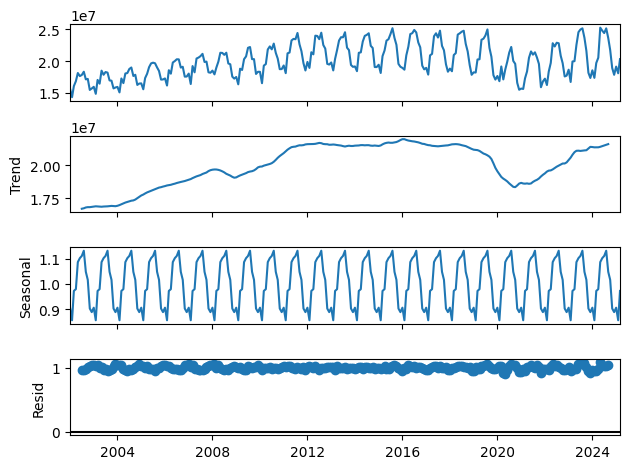

In [34]:
result = seasonal_decompose(energia_total_xmes, model='multiplicative', period=12)
result.plot()
plt.show()

###Conclusiones:
* La serie de tiempo presenta un comportamiento multiplicativo, reflejado en el aumento progresivo de la producción energética a lo largo del tiempo.
* En la tendencia se identifican dos periodos de decrecimiento: el primero coincide con la crisis económica de 2008 y la pandemia de influenza A H1N1 en 2009, mientras que el segundo corresponde a la pandemia de COVID-19, ambos asociados con reducciones temporales en la generación de energía.

##Análisis y modificación de variables

###Cración de nuevas variables (pandemia y crisis económica)

In [35]:
# Rango 1: Crisis financiera (2008–2009) y pandemia (2009-2010)
inicio_1 = pd.Timestamp('2008-04-01')
fin_1 = pd.Timestamp('2010-08-31')

# Rango 2: Pandemia COVID (2019–2023)
inicio_2 = pd.Timestamp('2019-11-01')
fin_2 = pd.Timestamp('2023-01-31')

# Creación de la columna binaria "pandemia"
energia_total_xmes['pandemia'] = (
    ((energia_total_xmes.index >= inicio_1) & (energia_total_xmes.index <= fin_1)) |
    ((energia_total_xmes.index >= inicio_2) & (energia_total_xmes.index <= fin_2))
).astype(int)

# Creación de columna split un mes antes y un año antes
energia_total_xmes['energia_lag_1'] = energia_total_xmes['energia_generada'].shift(1)
energia_total_xmes['energia_lag_12'] = energia_total_xmes['energia_generada'].shift(12)
energia_total_xmes = energia_total_xmes.dropna()

### Codificación para la forma cíclica de los meses

Para explicar la forma cíclica de los meses se codifica la información

In [36]:

energia_total_xmes['month'] = energia_total_xmes.index.month
energia_total_xmes['month_sin'] = np.sin(2 * np.pi * energia_total_xmes['month'] / 12)
energia_total_xmes['month_cos'] = np.cos(2 * np.pi * energia_total_xmes['month'] / 12)
energia_total_xmes.head(5)


,energia_generada,pandemia,energia_lag_1,energia_lag_12,month,month_sin,month_cos
fecha_dt,,,,,,,
2003-01-01,1.596412e+07,0,1.570100e+07,1.567672e+07,1,0.500000,8.660254e-01
2003-02-01,1.486115e+07,0,1.596412e+07,1.433577e+07,2,0.866025,5.000000e-01
2003-03-01,1.704518e+07,0,1.486115e+07,1.607596e+07,3,1.000000,6.123234e-17
2003-04-01,1.645106e+07,0,1.704518e+07,1.684303e+07,4,0.866025,-5.000000e-01
2003-05-01,1.849538e+07,0,1.645106e+07,1.812506e+07,5,0.500000,-8.660254e-01


In [37]:
energia_total_xmes.drop(columns=['month'], inplace=True, errors='ignore')
energia_total_xmes.head(5)

,energia_generada,pandemia,energia_lag_1,energia_lag_12,month_sin,month_cos
fecha_dt,,,,,,
2003-01-01,1.596412e+07,0,1.570100e+07,1.567672e+07,0.500000,8.660254e-01
2003-02-01,1.486115e+07,0,1.596412e+07,1.433577e+07,0.866025,5.000000e-01
2003-03-01,1.704518e+07,0,1.486115e+07,1.607596e+07,1.000000,6.123234e-17
2003-04-01,1.645106e+07,0,1.704518e+07,1.684303e+07,0.866025,-5.000000e-01
2003-05-01,1.849538e+07,0,1.645106e+07,1.812506e+07,0.500000,-8.660254e-01


In [38]:
#split the data
n = len(energia_total_xmes)

# Split 60:20:20 (train:validation:test)
train_df = energia_total_xmes[0:int(n*0.6)].copy()
val_df = energia_total_xmes[int(n*0.6):int(n*0.8)].copy()
test_df = energia_total_xmes[int(n*0.8):].copy()

train_df.shape, val_df.shape, test_df.shape

((160, 6), (53, 6), (54, 6))

### Escalamiento

In [39]:
#Minmax scaler
from sklearn.preprocessing import MinMaxScaler


In [40]:
feature_cols = ['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12']
target_col = ['energia_generada']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_X.fit(train_df[feature_cols])
scaler_y.fit(train_df[target_col])
train_df[feature_cols] = scaler_X.transform(train_df[feature_cols])
val_df[feature_cols]   = scaler_X.transform(val_df[feature_cols])
test_df[feature_cols]  = scaler_X.transform(test_df[feature_cols])

train_df[target_col] = scaler_y.transform(train_df[target_col])
val_df[target_col]   = scaler_y.transform(val_df[target_col])
test_df[target_col]  = scaler_y.transform(test_df[target_col])

In [41]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energia_generada,160.0,0.478331,0.228366,0.0,0.317407,0.448300,0.632481,1.0
pandemia,160.0,0.181250,0.386435,0.0,0.000000,0.000000,0.000000,1.0
energia_lag_1,160.0,0.474359,0.229708,0.0,0.316396,0.444867,0.630173,1.0
energia_lag_12,160.0,0.497327,0.231010,0.0,0.344118,0.465705,0.676465,1.0
month_sin,160.0,0.510100,0.356178,0.0,0.250000,0.500000,0.933013,1.0
month_cos,160.0,0.502706,0.352987,0.0,0.250000,0.500000,0.795753,1.0


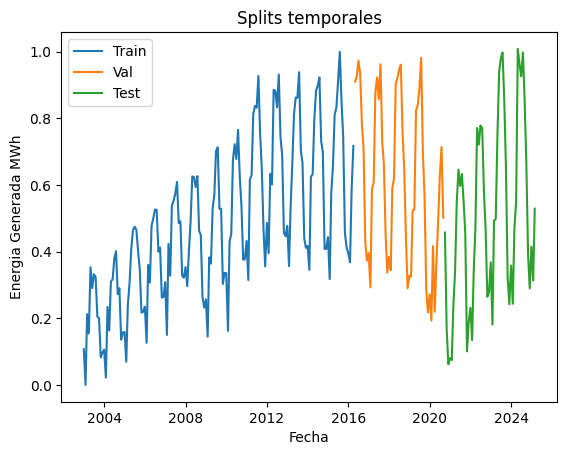

In [42]:
plt.figure()
plt.plot(train_df.index, train_df['energia_generada'].values, label='Train')
plt.plot(val_df.index, val_df['energia_generada'].values, label='Val')
plt.plot(test_df.index, test_df['energia_generada'].values, label='Test')
plt.legend()
plt.title('Splits temporales')
plt.xlabel('Fecha'); plt.ylabel('Energia Generada MWh')
plt.show()

### Ventana de desplazamiento

In [43]:
from typing import List, Optional, Tuple
def make_windows(
    df,
    input_width: int,
    label_width: int,
    shift: int,
    label_cols: List[str],
    feature_cols: Optional[List[str]] = None,
    stride: int = 1
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Crea ventanas (X) y etiquetas (y) a partir de un DataFrame.

    Parámetros
    ----------
    df           : DataFrame ordenado temporalmente.
    input_width  : longitud de la secuencia de entrada.
    label_width  : horizonte de salida.
    shift        : separación entre fin de entrada e inicio de etiqueta.
                   (tip: multi-step típico -> shift = label_width; single-step -> shift = 1)
    label_cols   : columnas objetivo (una o varias).
    feature_cols : columnas a usar como features (por defecto: todas las columnas del df).
    stride       : paso entre ventanas consecutivas (1 = superpuestas).

    Retorna
    -------
    X: (N, input_width, num_features)
    y: (N, label_width, num_labels)
    """
    X_list, Y_list = [], []
    #definición de columnas
    if feature_cols is None:
        feature_cols = list(df.columns)
    #Cálculo de tamaño de ventanas
    total_window_size = input_width + shift
    label_start = total_window_size - label_width
    #Convertir los datos en matrices de np
    data_feat = df[feature_cols].to_numpy(dtype=np.float32)
    data_lab  = df[label_cols].to_numpy(dtype=np.float32)
    #validación de longitud
    n = len(df)
    last_start = n - total_window_size
    if last_start < 0:
        raise ValueError("La serie es demasiado corta para los parámetros de ventana.")
    #Bucle para generar las ventanas
    for start in range(0, last_start + 1, stride):
        # Ventana completa
        win_feat = data_feat[start : start + total_window_size]   # (Tw, F)
        # Inputs
        X = win_feat[:input_width, :]                             # (Iw, F)
        # Labels (solo objetivos)
        win_lab = data_lab[start : start + total_window_size]     # (Tw, L)
        Y = win_lab[label_start : label_start + label_width, :]   # (Lw, L)

        X_list.append(X)
        Y_list.append(Y)

    X = np.stack(X_list, axis=0)
    Y = np.stack(Y_list, axis=0)
    return X, Y


In [44]:
#Multistep
Xtr, ytr = make_windows(train_df, input_width=24, label_width=12, shift=12,
                        label_cols=["energia_generada"],feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])
Xva, yva = make_windows(val_df,   input_width=24, label_width=12, shift=12,
                        label_cols=["energia_generada"], feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])
Xte, yte = make_windows(test_df,  input_width=24, label_width=12, shift=12,
                        label_cols=["energia_generada"], feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])

## Modelos de Redes neuronales

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM, Dropout
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import random

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

n_features = Xtr.shape[2]
n_input = 12
EPOCHS = 500
BATCH_SIZE = 1

###Modelos RNN




In [46]:
#modelo RNN
model = Sequential()
model.add(SimpleRNN(5, activation='relu', input_shape=(n_input, n_features), return_sequences = False)),
Dropout(0.2),
model.add(Dense(1, activation='relu'))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='mse')
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

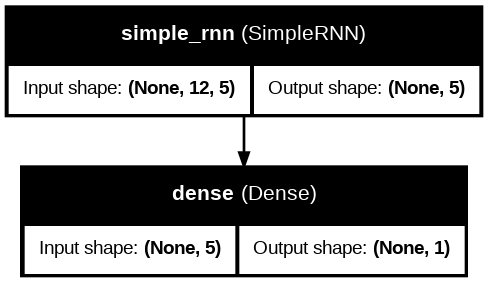

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model,
           to_file='modelo_rnn.png',
           show_shapes=True,           # muestra dimensiones de entrada/salida
           show_layer_names=True,      # muestra nombres de las capas
           dpi=96,
           expand_nested=True)

###Modelo LSTM

In [48]:
ms_lstm = Sequential([
LSTM(64, activation='tanh', input_shape=(n_input, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])
ms_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=['mae']
)

ms_lstm.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

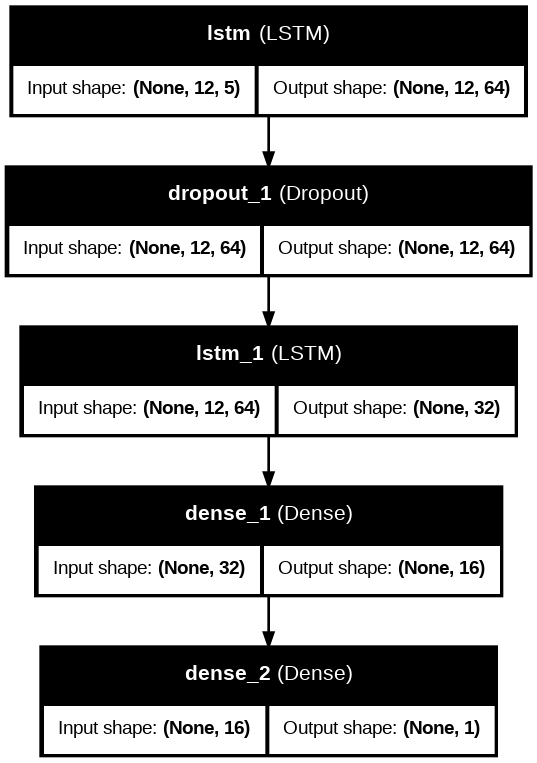

In [49]:
plot_model(ms_lstm,
           to_file='modelo_rnn.png',
           show_shapes=True,           # muestra dimensiones de entrada/salida
           show_layer_names=True,      # muestra nombres de las capas
           dpi=96,
           expand_nested=True)

###Entrenamiento y Predicción multistep RNN

In [50]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)
historySRNN = model.fit(
    Xtr,
    ytr,
    validation_data=(Xva, yva),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[ES],
    verbose=1
)

Epoch 1/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3297 - val_loss: 0.3703
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3297 - val_loss: 0.3703
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3297 - val_loss: 0.3703
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3289 - val_loss: 0.3703
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3281 - val_loss: 0.3703
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3269 - val_loss: 0.3703
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3253 - val_loss: 0.3703
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3240 - val_loss: 0.3689
Epoch 9/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3220 - val_loss: 0.3636
Epoch 10/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3171 - val_loss: 0.3550
Epoch 11/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3066 - val_loss: 0.3436
Epoch 12/500
125/125 ━━━━━━━━━━━━━━━━━━

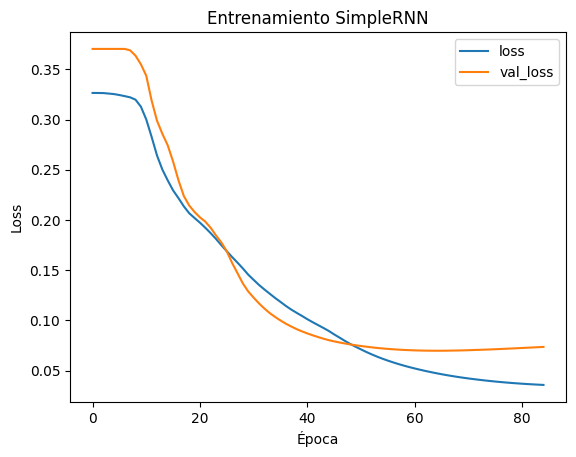

In [51]:
plt.figure()
plt.plot(historySRNN.history['loss'], label='loss')
plt.plot(historySRNN.history['val_loss'], label='val_loss')
plt.title('Entrenamiento SimpleRNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
#Evaluacion
def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100.0

def inverse_transform_y(y_scaled, scaler_y):
    """Invierte el escalado de la variable 'energia_generada'."""
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    return scaler_y.inverse_transform(y_scaled).flatten()

In [53]:
# Predicción
y_pred_scaled = model.predict(Xte, verbose=0)
y_true_scaled = yte

# Invertir la escala
y_pred = inverse_transform_y(y_pred_scaled, scaler_y)
y_true = inverse_transform_y(y_true_scaled, scaler_y)

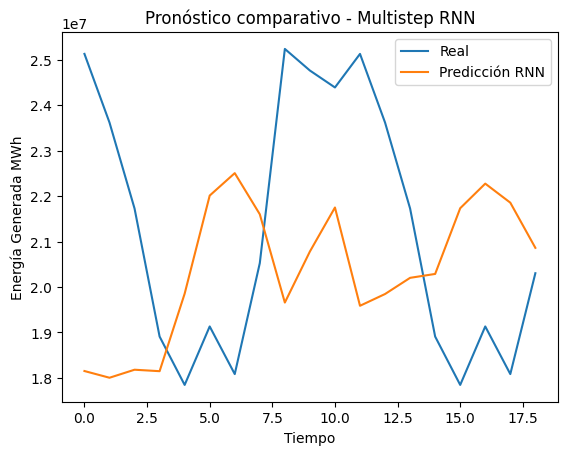

In [54]:
y_true_aligned = y_true[-len(y_pred):]
plt.figure()
plt.plot(y_true_aligned, label='Real')
plt.plot(y_pred, label='Predicción RNN')
plt.title('Pronóstico comparativo - Multistep RNN')
plt.xlabel('Tiempo')
plt.ylabel('Energía Generada MWh')
plt.legend()
plt.show()

In [55]:
min_len = min(len(y_true), len(y_pred))
y_true_aligned = y_true[-min_len:]   # últimos valores reales (los comparables)
y_pred_aligned = y_pred[-min_len:]   # predicciones correspondientes

def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def MAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100.0

print("Métricas en conjunto de test (SimpleRNN):")
Mae_MSRNN= MAE(y_true_aligned, y_pred_aligned)
RMSE_MSRNN=RMSE(y_true_aligned, y_pred_aligned)
MAPE_MSRNN=MAPE(y_true_aligned, y_pred_aligned)
print("MAE :", MAE(y_true_aligned, y_pred_aligned))
print("RMSE:", RMSE(y_true_aligned, y_pred_aligned))
print("MAPE:", MAPE(y_true_aligned, y_pred_aligned))

Métricas en conjunto de test (SimpleRNN):
MAE : 3319318.5
RMSE: 3763270.773756255
MAPE: 15.318507


###Entrenamiento y predicción Multispet LSTM

In [56]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
hist_ms = ms_lstm.fit(
    Xtr,
    ytr,
    validation_data=(Xva, yva),
    epochs=300,
    batch_size=1,
    callbacks=[es],
    verbose=1
)

Epoch 1/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0791 - mae: 0.2172 - val_loss: 0.0874 - val_mae: 0.2564
Epoch 2/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0318 - mae: 0.1513 - val_loss: 0.0769 - val_mae: 0.2444
Epoch 3/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0317 - mae: 0.1518 - val_loss: 0.0753 - val_mae: 0.2426
Epoch 4/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0319 - mae: 0.1516 - val_loss: 0.0789 - val_mae: 0.2471
Epoch 5/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0309 - mae: 0.1500 - val_loss: 0.0871 - val_mae: 0.2565
Epoch 6/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0307 - mae: 0.1494 - val_loss: 0.0761 - val_mae: 0.2434
Epoch 7/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0314 - mae: 0.1512 - val_loss: 0.0770 - val_mae: 0.2446
Epoch 8/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0313 - mae: 0.1510 - val_loss: 0.0864 - val_mae: 0.2556
Epoch 9/300
125/125 ━━━━━━━━━━━━━━━━━━━━

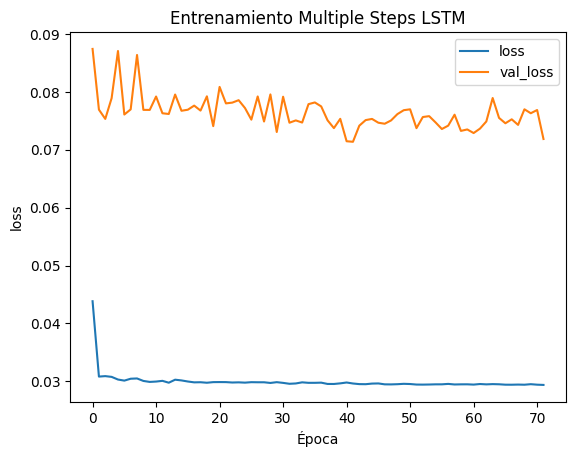

In [57]:
plt.figure()
plt.plot(hist_ms.history['loss'], label='loss')
plt.plot(hist_ms.history['val_loss'], label='val_loss')
plt.title('Entrenamiento Multiple Steps LSTM')
plt.xlabel('Época')
plt.ylabel('loss')
plt.legend()
plt.show()

In [58]:
# Predicción
y_pred_scaled = ms_lstm.predict(Xte, verbose=0)
y_true_scaled = yte

# Invertir la escala
y_pred = inverse_transform_y(y_pred_scaled, scaler_y)
y_true = inverse_transform_y(y_true_scaled, scaler_y)

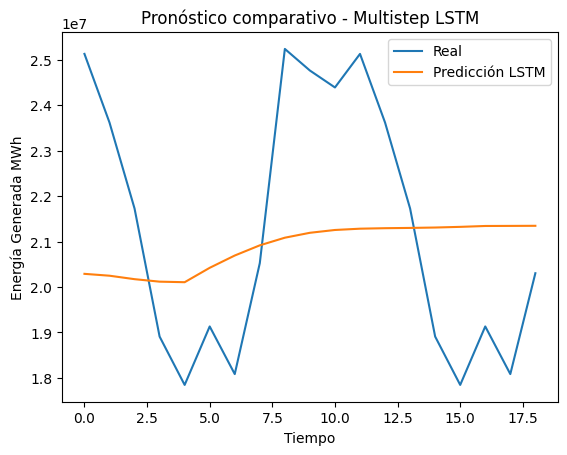

In [59]:
y_true_aligned = y_true[-len(y_pred):]
plt.figure()
plt.plot(y_true_aligned, label='Real')
plt.plot(y_pred, label='Predicción LSTM')
plt.title('Pronóstico comparativo - Multistep LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Energía Generada MWh')
plt.legend()
plt.show()

In [60]:
min_len = min(len(y_true), len(y_pred))
y_true_aligned = y_true[-min_len:]   # últimos valores reales (los comparables)
y_pred_aligned = y_pred[-min_len:]   # predicciones correspondientes
print("Métricas en conjunto de test (Simple LSTM):")
Mae_MSLSTM= MAE(y_true_aligned, y_pred_aligned)
RMSE_MSLSTM=RMSE(y_true_aligned, y_pred_aligned)
MAPE_MSLSTM=MAPE(y_true_aligned, y_pred_aligned)
print("MAE :", MAE(y_true_aligned, y_pred_aligned))
print("RMSE:", RMSE(y_true_aligned, y_pred_aligned))
print("MAPE:", MAPE(y_true_aligned, y_pred_aligned))

Métricas en conjunto de test (Simple LSTM):
MAE : 2493196.0
RMSE: 2782009.5623013233
MAPE: 11.607852


### Entrenamiento y Predicción Single step RNN

In [61]:
Xtr_ss, ytr_ss = make_windows(train_df, input_width=12, label_width=1, shift=1,
                        label_cols=["energia_generada"],feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])
Xva_ss, yva_ss = make_windows(val_df,   input_width=12, label_width=1, shift=1,
                        label_cols=["energia_generada"], feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])
Xte_ss, yte_ss = make_windows(test_df,  input_width=12, label_width=1, shift=1,
                        label_cols=["energia_generada"], feature_cols=['month_sin', 'month_cos', 'pandemia','energia_lag_1', 'energia_lag_12'])

In [62]:
tf.random.set_seed(SEED)
historySRNN_ss = model.fit(
    Xtr_ss,
    ytr_ss,
    validation_data=(Xva_ss, yva_ss),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es],
    verbose=1
)

Epoch 1/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0702 - val_loss: 0.0535
Epoch 2/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0588 - val_loss: 0.0463
Epoch 3/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0513 - val_loss: 0.0407
Epoch 4/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0456 - val_loss: 0.0360
Epoch 5/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0408 - val_loss: 0.0321
Epoch 6/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0367 - val_loss: 0.0287
Epoch 7/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0331 - val_loss: 0.0258
Epoch 8/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0298 - val_loss: 0.0232
Epoch 9/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0269 - val_loss: 0.0210
Epoch 10/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0244 - val_loss: 0.0192
Epoch 11/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0221 - val_loss: 0.0176
Epoch 12/500
148/148 ━━━━━━━━━━━━━━━━━━━━

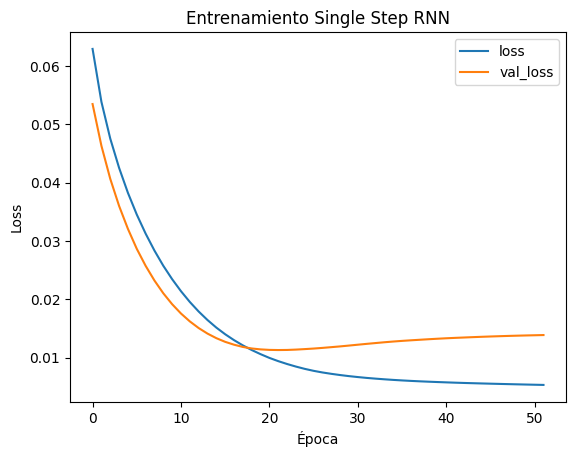

In [63]:
plt.figure()
plt.plot(historySRNN_ss.history['loss'], label='loss')
plt.plot(historySRNN_ss.history['val_loss'], label='val_loss')
plt.title('Entrenamiento Single Step RNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
# Predicción
y_pred_scaled_ss = model.predict(Xte_ss, verbose=0)
y_true_scaled_ss = yte_ss

# Invertir la escala
y_pred_ss = inverse_transform_y(y_pred_scaled_ss, scaler_y)
y_true_ss = inverse_transform_y(y_true_scaled_ss, scaler_y)

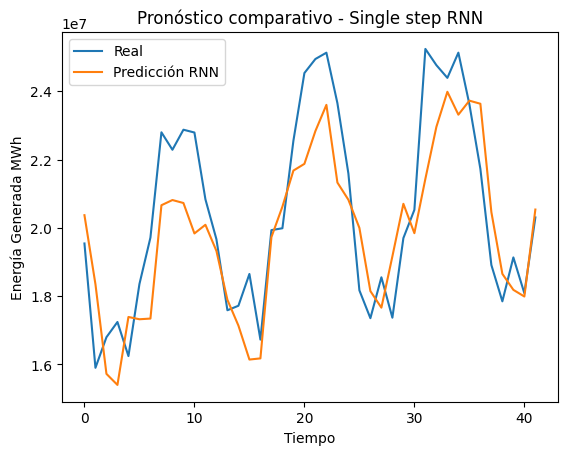

In [65]:

plt.figure()
plt.plot(y_true_ss, label='Real')
plt.plot(y_pred_ss, label='Predicción RNN')
plt.title('Pronóstico comparativo - Single step RNN')
plt.xlabel('Tiempo')
plt.ylabel('Energía Generada MWh')
plt.legend()
plt.show()

In [66]:
print("Métricas en conjunto de test (SS RNN):")
Mae_SSRNN= MAE(y_true_ss, y_pred_ss)
RMSE_SSRNN=RMSE(y_true_ss, y_pred_ss)
MAPE_SSRNN=MAPE(y_true_ss, y_pred_ss)
print("MAE :", MAE(y_true_ss, y_pred_ss))
print("RMSE:", RMSE(y_true_ss, y_pred_ss))
print("MAPE:", MAPE(y_true_ss, y_pred_ss))

Métricas en conjunto de test (SS RNN):
MAE : 1334948.625
RMSE: 1591747.0660579212
MAPE: 6.4698143


###Entrenamiento y Predicción Single Step LSTM

In [67]:
tf.random.set_seed(SEED)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
hist_lstm_ss = ms_lstm.fit(
    Xtr_ss,
    ytr_ss,
    validation_data=(Xva_ss, yva_ss),
    epochs=300,
    batch_size=1,
    callbacks=[es],
    verbose=1
)

Epoch 1/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0230 - mae: 0.1229 - val_loss: 0.0153 - val_mae: 0.0921
Epoch 2/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - mae: 0.0572 - val_loss: 0.0143 - val_mae: 0.0816
Epoch 3/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mae: 0.0548 - val_loss: 0.0142 - val_mae: 0.0821
Epoch 4/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mae: 0.0593 - val_loss: 0.0163 - val_mae: 0.0893
Epoch 5/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - mae: 0.0503 - val_loss: 0.0133 - val_mae: 0.0808
Epoch 6/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - mae: 0.0539 - val_loss: 0.0139 - val_mae: 0.0843
Epoch 7/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - mae: 0.0496 - val_loss: 0.0141 - val_mae: 0.0838
Epoch 8/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0039 - mae: 0.0481 - val_loss: 0.0141 - val_mae: 0.0848
Epoch 9/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13

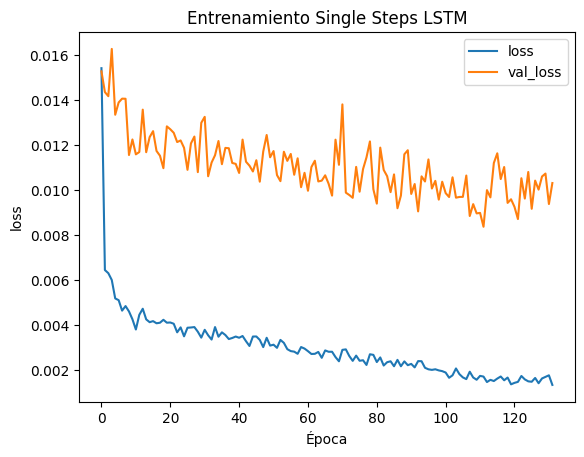

In [68]:
plt.figure()
plt.plot(hist_lstm_ss.history['loss'], label='loss')
plt.plot(hist_lstm_ss.history['val_loss'], label='val_loss')
plt.title('Entrenamiento Single Steps LSTM')
plt.xlabel('Época')
plt.ylabel('loss')
plt.legend()
plt.show()

In [69]:
# Predicción
y_pred_scaled_ss = ms_lstm.predict(Xte_ss, verbose=0)
y_true_scaled_ss = yte_ss

# Invertir la escala
y_pred_ss = inverse_transform_y(y_pred_scaled_ss, scaler_y)
y_true_ss = inverse_transform_y(y_true_scaled_ss, scaler_y)

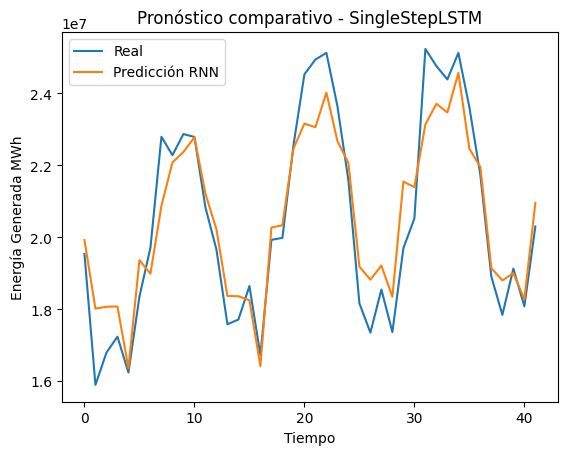

In [70]:
plt.figure()
plt.plot(y_true_ss, label='Real')
plt.plot(y_pred_ss, label='Predicción RNN')
plt.title('Pronóstico comparativo - SingleStepLSTM')
plt.xlabel('Tiempo')
plt.ylabel('Energía Generada MWh')
plt.legend()
plt.show()

In [71]:
print("Métricas en conjunto de test (SS LSTM):")
Mae_SSLSTM= MAE(y_true_ss, y_pred_ss)
RMSE_SSLSTM=RMSE(y_true_ss, y_pred_ss)
MAPE_SSLSTM=MAPE(y_true_ss, y_pred_ss)
print("MAE :", MAE(y_true_ss, y_pred_ss))
print("RMSE:", RMSE(y_true_ss, y_pred_ss))
print("MAPE:", MAPE(y_true_ss, y_pred_ss))

Métricas en conjunto de test (SS LSTM):
MAE : 805058.5
RMSE: 983441.0515246962
MAPE: 3.9706447


###Evaluación

In [72]:
from rich.table import Table
from rich.console import Console

In [73]:
t= Table(title='Evaluacion')
t.add_column('Metodo')
t.add_column('MAE')
t.add_column('RMSE')
t.add_column('MAPE')
t.add_row('Multiple Step RNN',f"{Mae_MSRNN:.3f}",
          f"{RMSE_MSRNN:.3f}",
          f"{MAPE_MSRNN:.2f}%" )
t.add_row('Multiple Step LSTM',f"{Mae_MSLSTM:.3f}",
          f"{RMSE_MSLSTM:.3f}",
          f"{MAPE_MSLSTM:.2f}%" )
t.add_row('Single Step RNN',f"{Mae_SSRNN:.3f}",
          f"{RMSE_SSRNN:.3f}",
          f"{MAPE_SSRNN:.2f}%" )
t.add_row('Single Step LSTM',f"{Mae_SSLSTM:.3f}",
          f"{RMSE_SSLSTM:.3f}",
          f"{MAPE_SSLSTM:.2f}%" )
console = Console()
console.print(t)


                        Evaluacion                         
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metodo             ┃ MAE         ┃ RMSE        ┃ MAPE   ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ Multiple Step RNN  │ 3319318.500 │ 3763270.774 │ 15.32% │
│ Multiple Step LSTM │ 2493196.000 │ 2782009.562 │ 11.61% │
│ Single Step RNN    │ 1334948.625 │ 1591747.066 │ 6.47%  │
│ Single Step LSTM   │ 805058.500  │ 983441.052  │ 3.97%  │
└────────────────────┴─────────────┴─────────────┴────────┘

##Conclusiones:
* Los resultados indican que los enfoques single step ofrecen un mejor rendimiento que los multi step, debido a su menor acumulación de error en horizontes de predicción cortos.
* Entre los modelos evaluados, el LSTM demostró la mayor capacidad de generalización y ajuste a los patrones temporales de la serie.
* Para fortalecer el poder predictivo del modelo, sería recomendable incorporar variables macroeconómicas y sectoriales, como el PIB, el consumo energético total y la distribución por tipo de fuente de energía.
